## parsing harps website

* [HARPS bank](https://www2.mpia-hd.mpg.de/homes/trifonov/HARPS_RVBank.html)

In [36]:
from urllib.request import urlopen, urlretrieve
from os.path import exists
from os.path import join
import sys

import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_3d
from astropy.io import ascii
from astroplan.plots import plot_finder_image
import matplotlib.pyplot as pl
from astropy.visualization.wcsaxes import SphericalCircle
import matplotlib.cm as cm
from collections import OrderedDict
import numpy as np
from tqdm import tqdm
from glob import glob
import sys
sys.path.append('../archive_digger/')
import archive_digger as ad

In [2]:
df = ad.get_harps_database(clobber=False)

Loaded: ../data/harps_db.csv


In [3]:
df.shape

(5105, 14)

In [4]:
ra, dec = 338.805332, 54.773557
coords = SkyCoord(ra=ra, dec=dec, unit=u.deg)

In [5]:
res = ad.query_target(coords, df, dist=10*u.arcsec)
res


Querying objects within 10.0 arcsec of ra,dec=(338.805332,54.773557)

Nearest HARPS obj to target is
HD218935: ra,dec=(347.9550,26.8473)

Try angular distance larger than d=103381.3599"



In [6]:
toi = 200.01
q = ad.query_toi(toi=toi, tic=None, clobber=False)
r = q['RA'].values[0]
d = q['Dec'].values[0]
target_coord = SkyCoord(ra=r, dec=d, unit=(u.hourangle, u.deg))
res = ad.query_target(target_coord, df, dist=10*u.arcsec)
res

Loaded: ../data/TOIs.csv

Querying objects within 10.0 arcsec of ra,dec=(354.9154583333333,-69.19604166666667)

There are 2 matches: ['HD222259A' 'HD222259']
                                                 2792  \
G [mag]                                         8.341   
Dist [pc]                                        46.2   
Explore data (GLS)          GLS of RVs | Inspect data   
Data products (dat)  HD222259A_HARPS_RVBank_ver02.dat   
Data products (csv)  HD222259A_HARPS_RVBank_ver02.csv   
RA_deg                                     354.914503   
DEC_deg                                    -69.195752   

                                                2793  
G [mag]                                        8.341  
Dist [pc]                                       46.2  
Explore data (GLS)         GLS of RVs | Inspect data  
Data products (dat)  HD222259_HARPS_RVBank_ver02.dat  
Data products (csv)  HD222259_HARPS_RVBank_ver02.csv  
RA_deg                                    354.914503  


,Target,RA,DEC,Sp. Type,T_eff [K],B [mag],V [mag],G [mag],Dist [pc],Explore data (GLS),Data products (dat),Data products (csv),RA_deg,DEC_deg
2792,HD222259A,23:39:39.4808,-69:11:44.707,G6V,5597.5,9.161,8.226,8.341,46.2,GLS of RVs | Inspect data,HD222259A_HARPS_RVBank_ver02.dat,HD222259A_HARPS_RVBank_ver02.csv,354.914503,-69.195752
2793,HD222259,23:39:39.4808,-69:11:44.707,G6V,5597.5,9.161,8.226,8.341,46.2,GLS of RVs | Inspect data,HD222259_HARPS_RVBank_ver02.dat,HD222259_HARPS_RVBank_ver02.csv,354.914503,-69.195752


In [7]:
res.columns

Index(['Target', 'RA', 'DEC', 'Sp. Type', 'T_eff [K]', 'B [mag]', 'V [mag]',
       'G [mag]', 'Dist [pc]', 'Explore data (GLS)', 'Data products (dat)',
       'Data products (csv)', 'RA_deg', 'DEC_deg'],
      dtype='object')

In [8]:
ad.ALL_DATA_PRODUCTS

['Data products (dat)', 'Data products (csv)']

In [18]:
r = res.iloc[0]
rv = ad.get_rv(r, col='Data products (csv)', return_fp=False)
rv

,target,ra,dec,BJD,RV_mlc_nzp,e_RV_mlc_nzp,RV_drs_nzp,e_RV_drs_nzp,RV_mlc,e_RV_mlc,...,PROGPI,AIRMASS,OBHAB,THAR_FP,DPR_TYPE,RHKp,dRHKp,sourceflag,vsinflag,metflag
0,GJ9201,91.090165,-55.31161,2.452989e+06,-0.020262,1.929829,263357.960908,3.558502,-5.544069,1.729180,...,Mayor,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objA,STAR_DARK_K,1.284732e-05,4.412264e-06,1,0,0
1,GJ9201,91.090165,-55.31161,2.452999e+06,3.532469,2.313156,15438.394042,4.548864,-1.904377,2.148608,...,Mayor,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objA,STAR_DARK_K,3.856967e-05,2.497980e-04,1,0,0
2,GJ9201,91.090165,-55.31161,2.453008e+06,-0.116337,1.060328,243334.652244,1.186930,-5.453131,0.624597,...,Mayor,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objA,STAR_DARK_K,1.479507e-05,4.381160e-06,1,0,0
3,GJ9201,91.090165,-55.31161,2.453296e+06,3.423486,1.576467,42159.508396,2.731336,-3.004980,1.456430,...,Mayor,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objA,STAR_DARK_K0,1.096707e-05,1.672691e-06,1,0,0
4,GJ9201,91.090165,-55.31161,2.453835e+06,-5.326543,1.502500,42155.186514,2.263147,-10.485645,1.366504,...,Mayor,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objA,STAR_DARK_K0,-9.999999e+06,-9.999999e+06,-9999999,-9999999,-9999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,GJ9201,91.090165,-55.31161,2.458918e+06,3.604071,1.592369,42666.953524,3.928806,-1.606917,1.005804,...,Bonfils,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objAB,STAR_SKY_M2,1.201255e-05,1.766867e-06,1,0,0
85,GJ9201,91.090165,-55.31161,2.458926e+06,3.585867,1.578294,42667.601840,3.908090,-2.686208,0.983315,...,UNKNOWN,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objAB,STAR_SKY_M2,2.016466e-05,6.376417e-06,1,0,0
86,GJ9201,91.090165,-55.31161,2.458928e+06,-0.813545,1.839502,42666.609311,4.889268,-7.147948,1.363750,...,UNKNOWN,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objAB,STAR_SKY_M2,1.473118e-05,2.817641e-06,1,0,0
87,GJ9201,91.090165,-55.31161,2.458930e+06,4.143025,1.860391,42671.628079,4.943096,-2.422639,1.391796,...,UNKNOWN,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objAB,STAR_SKY_M2,5.031135e-04,2.741016e-03,1,0,0


## finder chart

In [10]:
target_coord = SkyCoord(ra=target_coord.ra.deg, dec=target_coord.dec.deg, unit=(u.deg, u.deg))

Loaded: ../data/TOIs.csv


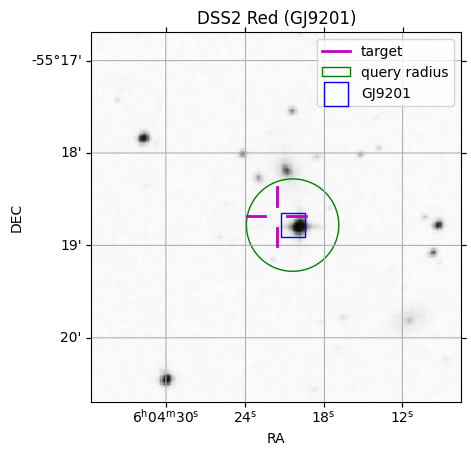

In [35]:
toi = 704.01
ang_dist = 30*u.arcsec
fov_rad = 120*u.arcsec
survey='DSS2 Red'

q = ad.query_toi(toi=toi, tic=None, clobber=False)
r = q['RA'].values[0]
d = q['Dec'].values[0]
target_coord = SkyCoord(ra=r, dec=d, unit=(u.hourangle, u.deg))
#convert hms to degree
target_coord = SkyCoord(target_coord.ra.deg, target_coord.dec.deg, unit=u.deg)
res = ad.query_target(target_coord, df, dist=ang_dist, verbose=False)

nearest_obj = res['Target'].values[0]
nearest_obj_ra,nearest_obj_dec =res[['RA_deg','DEC_deg']].values[0]
nearest_obj_coord = SkyCoord(ra=nearest_obj_ra, dec=nearest_obj_dec, unit=u.deg)

#target in reticle
ax,hdu=plot_finder_image(target_coord,fov_radius=fov_rad,reticle=True,survey=survey,reticle_style_kwargs={'label':'target'})
c = SphericalCircle((nearest_obj_ra, nearest_obj_dec)*u.deg, ang_dist, edgecolor='green', facecolor='none',
              transform=ax.get_transform('icrs'), label='query radius')
ax.set_title('{} ({})'.format(survey,nearest_obj))
ax.add_patch(c)

#harps objects within angular distance
coords = SkyCoord(ra=res['RA_deg'], dec=res['DEC_deg'], unit=u.deg)
sep2d = target_coord.separation(coords)

idxs = sep2d < ang_dist
colors = cm.rainbow(np.linspace(0, 1, idxs.sum()))

if len(coords[idxs])>1:
    for n,(coord,color) in enumerate(zip(coords[idxs],colors)):
        ax.scatter(coord.ra.deg, coord.dec.deg, transform=ax.get_transform('fk5'), s=300,
           marker='s', edgecolor=color, facecolor='none',label=res.loc[idxs,'Target'].values[n])
else:
    ax.scatter(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('fk5'), s=300,
           marker='s', edgecolor='blue', facecolor='none',label=res['Target'].values[0])

handles, labels = pl.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
pl.legend(by_label.values(), by_label.keys())

In [14]:
from os.path import isdir 
from os import makedirs

outdir = '../data/v02/'
if outdir is None:
    outdir = nearest_obj
else:
    outdir = join(outdir,nearest_obj)
if not isdir(outdir):
    makedirs(outdir)
    
fp = join(outdir,'{}_fov.png'.format(nearest_obj))
ax.figure.savefig(fp,bbox_inches=False)
print("Saved: ", fp)

Saved:  ../data/v02/GJ9201/GJ9201_fov.png


## results

In [17]:
fl = glob('../all_tois/v02/*')

tics = []
for f in fl:
    tics.append(f.split('/')[-1][3:])
len(tics)

0

100%|██████████| 49/49 [00:00<00:00, 275.34it/s]


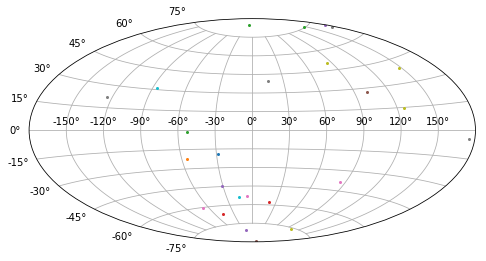

In [18]:
fig = pl.figure(figsize=(8,4.2))
ax = pl.subplot(111, projection="aitoff")

idxs = []
for tic in tqdm(tics):
    q = tois[tois['TIC ID']==int(tic)]
    idxs.append(q.index[0])
    r = q['RA'].values[0]
    d = q['Dec'].values[0]
    target_coord = SkyCoord(ra=r, dec=d, unit=(u.hourangle, u.deg))
    pl.plot(target_coord.ra.deg, target_coord.dec.deg, 'o', markersize=2)
pl.grid(True)
pl.subplots_adjust(top=0.95,bottom=0.0)

In [19]:
q.columns

Index(['TIC ID', 'TOI', 'Previous CTOI', 'Master', 'SG1A', 'SG1B', 'SG2',
       'SG3', 'SG4', 'SG5', 'TESS Disposition', 'TFOPWG Disposition',
       'TESS Mag', 'TESS Mag err', 'Planet Name', 'Planet Num', 'Source', 'RA',
       'Dec', 'PM RA (mas/yr)', 'PM RA err (mas/yr)', 'PM Dec (mas/yr)',
       'PM RA (mas/yr).1', 'Epoch (BJD)', 'Epoch (BJD) err', 'Period (days)',
       'Period (days) err', 'Duration (hours)', 'Duration (hours) err',
       'Depth (mmag)', 'Depth (mmag) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth)', 'Planet Radius (R_Earth) err',
       'Planet Insolation (Earth Flux)', 'Planet Equil Temp (K)', 'Planet SNR',
       'Stellar Distance (pc)', 'Stellar Distance (pc) err',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar log(g) (cm/s^2) err',
       'Stellar Radius (R_Sun)', 'Stellar Radius (R_Sun) err', 'Sectors',
       'Date TOI Created (UTC)', 'Date TOI Modified (UTC)', 'Comments'],

In [20]:
# observed tois
o = tois.loc[idxs]
o.shape

(49, 50)

In [21]:
cols = ['TESS Mag','TIC ID','TOI','Depth (mmag)','Planet Radius (R_Earth)','Period (days)','Stellar Radius (R_Sun)','Stellar Eff Temp (K)']

s = o[cols].sort_values(by='TESS Mag',ascending=True)
s.reset_index()

,index,TESS Mag,TIC ID,TOI,Depth (mmag),Planet Radius (R_Earth),Period (days),Stellar Radius (R_Sun),Stellar Eff Temp (K)
0,46,5.097000,261136679,144.01,0.314561,1.722310,6.267726,1.381960,5992.1001
1,95,6.953410,279741379,186.01,1.009393,2.556572,NaN,0.739077,4628.5298
2,589,7.309000,55092869,664.01,2.647894,13.692776,4.736094,3.066790,5326.0000
3,360,7.652000,143350972,440.01,0.370878,2.075540,1.081700,1.108340,5771.4600
4,109,7.771000,410214986,200.01,3.889551,7.780000,8.137500,1.193480,5414.0000
5,123,7.965000,167415965,214.01,0.481733,1.982974,18.552747,0.900064,5346.1699
6,350,8.113401,31374837,431.01,2.227239,3.867820,12.459410,0.802493,4891.0000
7,88,8.141000,207141131,179.01,1.232507,2.813921,4.137394,0.838949,5058.0000
8,319,8.265090,120896927,402.01,0.441054,1.899079,4.755833,0.887665,5175.2002
9,171,8.429280,37749396,260.01,0.745653,1.637881,13.470018,0.631587,4111.0000


In [30]:
ad.query_toi(toi=144.01)[['RA','Dec']]

Saved: ../data/TOIs.csv


,RA,Dec
46,05:37:11.76,-80:27:53.1


In [31]:
46 in idxs

True

In [33]:
s.to_csv('TOI_with_harps_data.csv',index=False)

In [34]:
s['TOI'].to_csv('TOI_with_harps_data.txt',index=False)

In [10]:
ra_from_simbad ='05:37:09.8851202601 '
dec_from_simbad='-80:28:08.831347245'

ra_from_alerts = '05:37:11.76'
dec_from_alerts= '-80:27:53.1'
 
sc1 = SkyCoord(ra=ra_from_simbad,dec=dec_from_simbad,unit=(u.hourangle,u.deg))
sc2 = SkyCoord(ra=ra_from_alerts,dec=dec_from_alerts,unit=(u.hourangle,u.deg))

In [11]:
sc1.separation(sc2)

<Angle 0.00455733 deg>